In [1]:
import tensorflow as tf
from tensorflow import keras

C:\Users\alexe\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
tf.__version__

'2.15.0'

In [8]:
model = keras.models.load_model('bees-wasps.h5')

In [9]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('bees-wasps.tflite', 'wb') as f_out:
    f_out.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\alexe\AppData\Local\Temp\tmphziiifnf\assets


INFO:tensorflow:Assets written to: C:\Users\alexe\AppData\Local\Temp\tmphziiifnf\assets


In [10]:
!ls -lh bees-wasps.tflite

-rw-r--r-- 1 alexey 197121 43M Nov 17 22:50 bees-wasps.tflite


In [11]:
import tensorflow.lite as tflite

In [12]:
interpreter = tflite.Interpreter(model_path='bees-wasps.tflite')
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

In [13]:
output_index

13

In [14]:
from io import BytesIO
from urllib import request

from PIL import Image

def download_image(url):
    with request.urlopen(url) as resp:
        buffer = resp.read()
    stream = BytesIO(buffer)
    img = Image.open(stream)
    return img


def prepare_image(img, target_size):
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img = img.resize(target_size, Image.NEAREST)
    return img

C:\Users\alexe\AppData\Local\Temp\ipykernel_7844\2487457277.py:17: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  img = img.resize(target_size, Image.NEAREST)


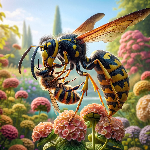

In [15]:
img = download_image('https://habrastorage.org/webt/rt/d9/dh/rtd9dhsmhwrdezeldzoqgijdg8a.jpeg')
img = prepare_image(img, target_size=(150, 150))
img

In [16]:
import numpy as np

In [17]:
def prepare_input(x):
    return x / 255.0

In [18]:
x = np.array(img, dtype='float32')
X = np.array([x])
X = prepare_input(X)

In [19]:
X[0, 0, 0, 0]

0.94509804

In [20]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()

preds = interpreter.get_tensor(output_index)

In [21]:
preds

array([[0.65898407]], dtype=float32)

Question 5

```
$ docker images agrigorev/zoomcamp-bees-wasps:v2
REPOSITORY                      TAG       IMAGE ID       CREATED         SIZE
agrigorev/zoomcamp-bees-wasps   v2        b9f6c13de368   2 minutes ago   662MB
```

Question 6

```
docker build -t bees-wasps-homework . 
docker run -it --rm -p 8080:8080 bees-wasps-homework 

python test.py
```